<a href="https://colab.research.google.com/github/souken-b/calc_OWC/blob/main/calc_flowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
def f(q: 'flow_rate', n_diam: 'nozzle diameter', temp, p_up, p_down, n_ratio: 'nozzle ratio', h_ratio: 'specific heat ratio', flow_flg: 'flow direction flg') -> 'f(q)=aq^3+bq^2+q+d':
  # air viscosity rate(Pa・s)
  a_v_rate = 18.2 * 1e-6
  # air temparature(K)
  a_temp = 273 + 25
  # sutherland constant
  c_suther = 117
  # viscosity rate
  v_rate = a_v_rate * ((a_temp + c_suther) / (temp + c_suther)) * (temp / a_temp)**(3/2)
  # upstream density
  if (flow_flg):
    dens_up = (p_up * (28.93/1000)) / (8.3144 * temp)
  else:
    dens_up = 1.225
  c_lambda = (4/(pi*n_diam))*(dens_up/v_rate)
  # 膨張補正係数
  exp_coef = 1
  H = (exp_coef ** 2) * ((pi*((n_diam / 2)**2)) ** 2) * 2 * (p_up - p_down) / dens_up
  # 実験値
  if (flow_flg):
    # forward flow
    A_0 = 0.601
    B = 22.7
    C = 815
    D = 1401
  else:
    # backward flow
    A_0 = 0.626
    B = 26.2
    C = 1733
    D = 2794
  
  coef_a = c_lambda ** 2
  coef_b = c_lambda * (B + C)
  coef_c = B * C - (c_lambda ** 2) * (A_0 ** 2) *  H
  coef_d = -(c_lambda * (A_0 ** 2) * D * H)
  return (coef_a * q ** 3 + coef_b * q ** 2 + coef_c * q +coef_d)



In [157]:
def newton_raphson(f, q1):
  fq = diff(f, q)
  threshold = 1e-6
  res = threshold + 1

  while res > threshold:
    q2 = float(q1 - (f.subs(q, q1) / fq.subs(q, q1)))
    res = np.abs(q2 - q1)
    q1 = q2
  return q2


In [158]:
q = Symbol('q')
n_diam = 0.0081235
temp = 273 + 25
p_down = 101325 
n_ratio = 0.1022
h_ratio = 1.4

In [159]:
t_forward = np.linspace(0, np.pi, 500)
sin_list = np.sin(t_forward)
p1_list_in = [(1000*i + 101325 ) for i in sin_list]
q1_list_forward = []

In [160]:
for p1 in p1_list_in:
  q1 = newton_raphson(f(q, n_diam, temp, p1, p_down, n_ratio, h_ratio, True), q1=0.0009)
  q1_list_forward.append(q1)

In [161]:
q1_list_cc_forward = [(i * 1e6) for i in q1_list_forward]

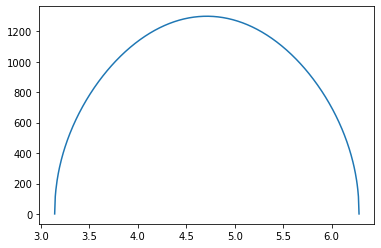

In [162]:
plt.plot(t, q1_list_cc_forward)

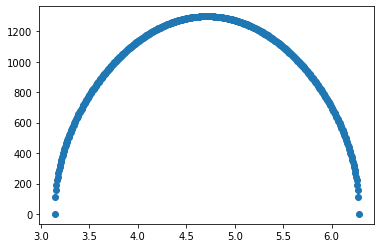

In [163]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t, q1_list_cc_forward)
fig.show()

In [164]:
q = Symbol('q')
n_diam = 0.0081235
temp = 273 + 20
p_up = 101325 
n_ratio = 0.1022
h_ratio = 1.4

In [165]:
t_back = np.linspace(np.pi, 2*np.pi, 500)
sin_list = np.sin(t_back)
p2_list_out = [(1000*i + 101325 ) for i in sin_list]
q1_list_back = []

In [166]:
for p2 in p2_list_out:
  q1_out = newton_raphson(f(q, n_diam, temp, p_up, p2, n_ratio, h_ratio, False), q1=0.0009)
  q1_list_back.append(q1_out)

In [167]:
q1_list_cc_back = [-(i * 1e6) for i in q1_list_back]


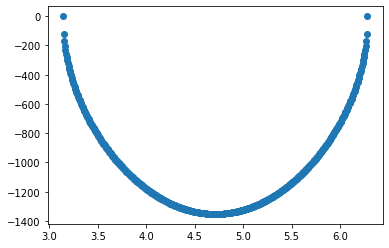

In [168]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t, q1_list_cc_back)
fig.show()

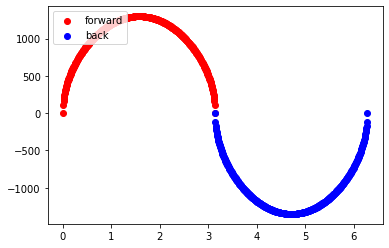

In [169]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(t_forward, q1_list_cc_forward, c='red', label='forward')
ax.scatter(t_back, q1_list_cc_back, c='blue', label='back')
ax.legend(loc='upper left')
fig.show()